# CREDIT CARD FRAUD DETECTION

### 1. Import the libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Importing the dataset

In [52]:
df=pd.read_csv("creditcardcsvpresent.csv")

In [53]:
df.shape

(3075, 10)

### 3. Data Processing

In [54]:
df.isnull().sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is decli0ed                       0
Total Number of declines/day      0
isForeig0Tra0sactio0              0
isHighRiskCou0tr1                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradule0t                       0
dtype: int64

0    2627
1     448
Name: isFradule0t, dtype: int64
Fraud Class: 0.1456910569105691%


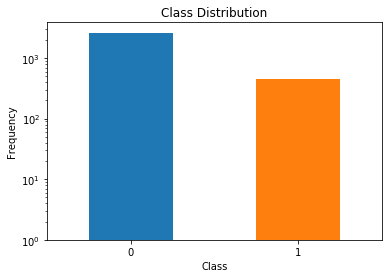

In [55]:
classDist = df['isFradule0t'].value_counts()
print(classDist)
plt.title("Class Distribution")
classDist.plot(kind = 'bar',log=True, rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")
print("Fraud Class: " + str(classDist[1]/(classDist[0]+classDist[1])) + str('%'))

### 4. Creating Feature Matrix (fm) and Target Vector (tv)

In [56]:
fm=df.iloc[:,:-1]
print(fm.head())

   Average Amount/transaction/day  Transaction_amount  Is decli0ed  \
0                           100.0              3000.0            0   
1                           100.0              4300.0            0   
2                           185.5              4823.0            1   
3                           185.5              5008.5            1   
4                           500.0             26000.0            0   

   Total Number of declines/day  isForeig0Tra0sactio0  isHighRiskCou0tr1  \
0                             5                     1                  1   
1                             5                     1                  1   
2                             5                     0                  0   
3                             8                     0                  0   
4                             0                     1                  1   

   Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  
0                         0                   0.0  

In [57]:
tv=df["isFradule0t"]
print(tv.head())

0    1
1    1
2    1
3    1
4    1
Name: isFradule0t, dtype: int64


In [58]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_tv=LabelEncoder()
labelencoder_tv.fit_transform(tv)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
tv=labelencoder_tv.fit_transform(tv)

In [60]:
print(tv)

[1 1 1 ... 0 0 0]


In [61]:
print(type(fm))

<class 'pandas.core.frame.DataFrame'>


In [62]:
print(type(tv))

<class 'numpy.ndarray'>


### 5. Split the Dataset into Training Set and Testing Set

In [63]:
from sklearn.model_selection import train_test_split
fm_train,fm_test,tv_train,tv_test=train_test_split(fm,tv,test_size=0.2)

In [64]:
print(fm_train.shape)
print(tv_train.shape)
print(fm_test.shape)
print(tv_test.shape)

(2460, 9)
(2460,)
(615, 9)
(615,)


### 6. Fitting the Model (Using Naive Bayes Algorithm)

In [65]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(fm_train, tv_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
tv_pred_train=gnb.predict(fm_train)

In [67]:
tv_pred_train[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [68]:
gnb.fit(fm_test, tv_test)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Predicting Targets for the Test Data

In [69]:
tv_pred_test=gnb.predict(fm_test)
tv_pred_test[:5]

array([0, 0, 0, 1, 0], dtype=int64)

#### Computing accuracy score and confusion matrix

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
as_train=accuracy_score(tv_train,tv_pred_train)
cm_train=confusion_matrix(tv_train,tv_pred_train)
print(as_train)
print(cm_train)

0.9406504065040651
[[2029   70]
 [  76  285]]


In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
as_train=accuracy_score(tv_train,tv_pred_train)
print("Train Result: ",as_train)
as_test_dtc=accuracy_score(tv_test,tv_pred_test)
print("Test Result:",as_test)

Train Result:  0.9406504065040651
Test Result: 0.9382113821138212


In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
as_test=accuracy_score(tv_test,tv_pred_test)
cm_test=confusion_matrix(tv_test,tv_pred_test)
print(as_test)
print(cm_test)

0.9544715447154472
[[517  11]
 [ 17  70]]


Text(0.5, 1.0, 'Truth vs Predicted')

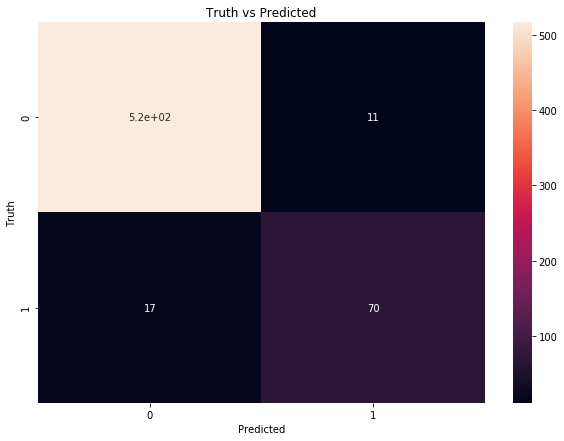

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_test,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Truth vs Predicted')

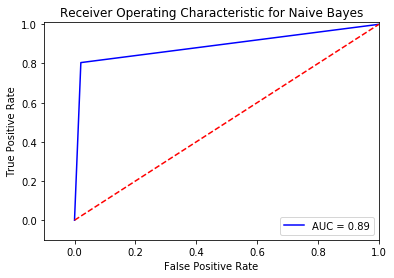

In [75]:
fpr, tpr, thresholds = roc_curve(tv_test.ravel(),tv_pred_test)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()